# Support Vector Machine Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

import pickle

X_train_smt = pickle.load(open("saved_feats/ShuffleSplit_X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/ShuffleSplit_X_test", "rb"))
y_train_smt = pickle.load(open("saved_feats/ShuffleSplit_y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/ShuffleSplit_y_test", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

In [2]:
clf_linearSVC = LinearSVC()
clf_linearSVC.fit(X_train_smt, y_train_smt)

predictedLinearSVC = clf_linearSVC.predict(X_test)

In [3]:
print('Average accuracy :', np.mean(
    predictedLinearSVC == y_test)*100)
print('Train accuracy :', (clf_linearSVC.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_linearSVC.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, predictedLinearSVC))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictedLinearSVC))

Average accuracy : 83.4833731398126
Train accuracy : 97.03824167159472
Test accuracy : 83.4833731398126

 CONFUSION MATRIX
[[  53   23   43]
 [  34   91  125]
 [ 169  505 4400]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.21      0.45      0.28       119
     Neutral       0.15      0.36      0.21       250
    Positive       0.96      0.87      0.91      5074

    accuracy                           0.83      5443
   macro avg       0.44      0.56      0.47      5443
weighted avg       0.91      0.83      0.87      5443



## SVM OneVsRestClassifier

In [4]:
clf_svc = OneVsRestClassifier(SVC())
clf_svc.fit(X_train_smt, y_train_smt)
pred_svc = clf_svc.predict(X_test)
estim_prob_svc = np.array(clf_svc.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc = np.exp(estim_prob_svc)/np.sum(np.exp(estim_prob_svc),
                                              axis=1, keepdims=True)  # softmax after the voting

In [5]:
print('Predicted classes:', clf_svc.classes_)
print('Average accuracy :', np.mean(pred_svc == y_test)*100)
print('Train accuracy :', (clf_svc.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 93.42274480984752
Train accuracy : 99.99342926604902
Test accuracy : 93.42274480984752

 CONFUSION MATRIX
[[   9    2  108]
 [   3   10  237]
 [   0    8 5066]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.75      0.08      0.14       119
     Neutral       0.50      0.04      0.07       250
    Positive       0.94      1.00      0.97      5074

    accuracy                           0.93      5443
   macro avg       0.73      0.37      0.39      5443
weighted avg       0.91      0.93      0.91      5443



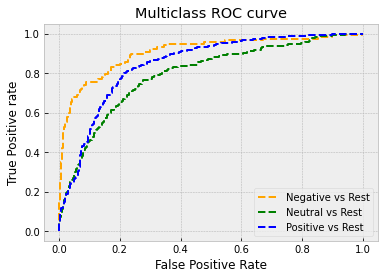

In [6]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

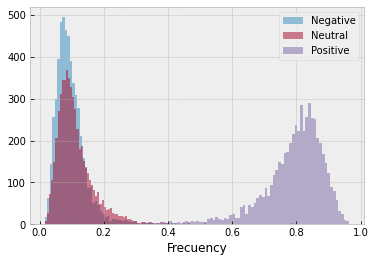

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(pred_prob_svc[:, 0], 100, alpha=0.5, label="Negative")
ax.hist(pred_prob_svc[:, 1], 100, alpha=0.5, label="Neutral")
ax.hist(pred_prob_svc[:, 2], 100, alpha=0.5, label="Positive")
ax.set_xlabel('Probability')
ax.set_xlabel('Frecuency')
ax.legend(prop={'size': 10})

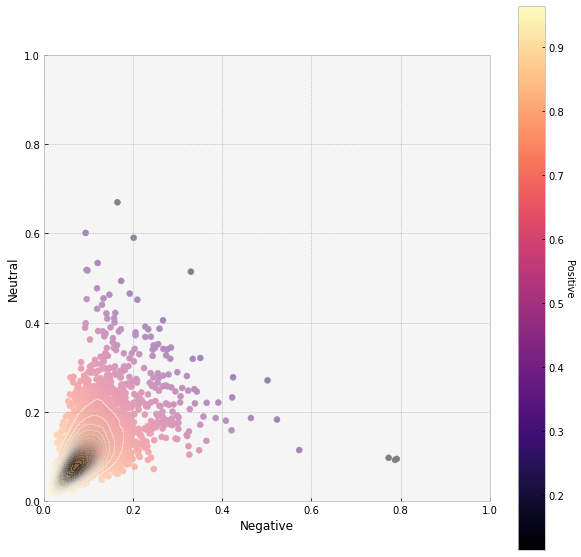

In [8]:
x = pred_prob_svc[:, 0]
y = pred_prob_svc[:, 1]
z = pred_prob_svc[:, 2]
cmap = plt.get_cmap('magma')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
plt.scatter(x, y, c=z, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Positive', rotation=270, fontsize=10, labelpad=10.0)
ax.set_aspect('equal', adjustable='box')
#ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

xx, yy = np.mgrid[0:1:100j, 0:1:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

plt.contourf(xx, yy, f, levels=20, cmap=plt.get_cmap('Greys'), alpha=0.5)
plt.show()